In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

from sklearn.neighbors import KNeighborsClassifier

(28, 28)

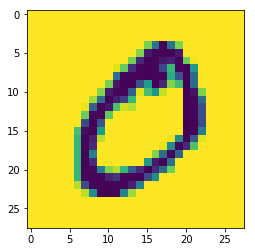

In [7]:
one = plt.imread('./data/0/0_1.bmp')
plt.imshow(one)
one.shape

In [5]:
X_train = []

for i in range(1, 501):
    X_train.append(plt.imread("./data/0//0_%d.bmp" % i))

In [8]:
X_train = []
X_test = []
y_train = []
y_test = []
for i in range(10):
    for k in range(1, 501):
        if k < 451:
            y_train.append(i)
            X_train.append(plt.imread("./data/%d//%d_%d.bmp" % (i, i, k)).reshape(-1))
        else:
            y_test.append(i)
            X_test.append(plt.imread("./data/%d//%d_%d.bmp" % (i, i, k)).reshape(-1))

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train, y_test = np.array(y_train), np.array(y_test)

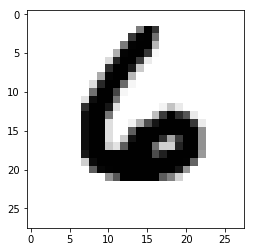

In [22]:
n = np.random.randint(0, 501, 1)
num = X_test[n].reshape(28, 28)
plt.imshow(num, cmap="gray")

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y = knn.predict(X_test)

In [27]:
y[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 7, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 4, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 3])

In [28]:
y_test[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [30]:
knn.score(X_test, y_test)

0.93

## 绘制图形

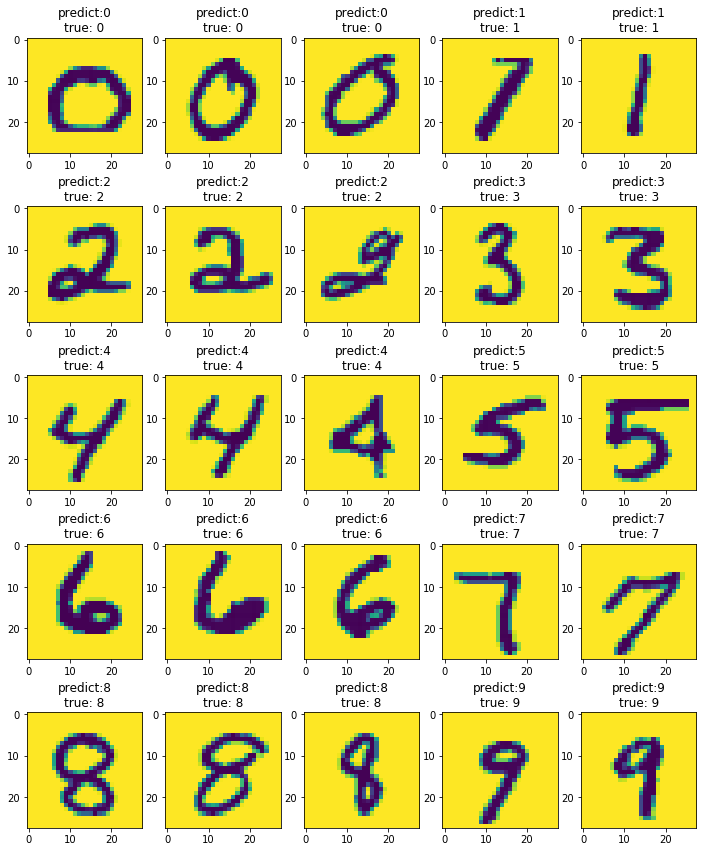

In [37]:
plt.figure(figsize=(12, 15))
im_data = X_test[::20]
im_predict = y[::20]
im_target = y_test[::20]
for i in range(25):
    plt.subplot(5, 5, (i+1))
    
    plt.imshow(im_data[i].reshape(28,28))
    
    plt.title("predict:%d" % im_target[i] + "\ntrue: %d" % (im_target[i]))

In [34]:
X_test[::20].shape

(25, 784)

In [38]:
salary = pd.read_csv("./salary.txt")
salary.shape

(32561, 15)

In [40]:
salary.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
s = salary[["sex","age", "education", "occupation", "race", "hours_per_week"]].copy()
s.head()
s.dtypes

sex               object
age                int64
education         object
occupation        object
race              object
hours_per_week     int64
dtype: object

In [53]:
### 将 str 映射处理为 int

edu = s.education.unique()
edu

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [54]:
s['education'] = s["education"].map(edu_int)

In [55]:
def edu_int(item):
    index = np.argwhere(edu == item)[0, 0]
    return index

In [56]:
s.head()

,sex,age,education,occupation,race,hours_per_week
0,Male,39,0,Adm-clerical,White,40
1,Male,50,0,Exec-managerial,White,13
2,Male,38,1,Handlers-cleaners,White,40
3,Male,53,2,Handlers-cleaners,Black,40
4,Female,28,0,Prof-specialty,Black,40


In [57]:
columns = ["occupation", "race"]

def occ2int(item):
    index = np.argwhere(s['occupation'].unique() == item)[0,0]
    return index

def race2int(item):
    index = np.argwhere(s["race"].unique() == item)[0,0]
    return index

def sex2int(item):
    index = np.argwhere(s["sex"].unique() == item)[0,0]
    return index

In [58]:
s['occupation'] = s["occupation"].map(occ2int)

In [59]:
s['race'] = s["race"].map(race2int)
s['sex'] = s["sex"].map(sex2int)

In [ ]:
y = salary["salary"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)